In [1]:
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
import pyproj
from shapely.ops import transform
import networkx as nx
import momepy


/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Number of routes

In [2]:
bus_sequences = pd.read_csv('data/london/bus-sequences.csv')

In [3]:
bus_sequences

,Route,Run,Sequence,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Location_Easting,Location_Northing,Heading,Virtual_Bus_Stop
0,1,1,1,14456,53369,490000235Z,NEW OXFORD STREET,529998,181428,74.0,0
1,1,1,2,29844,54468,490010131WB,MUSEUM STREET,530237,181523,53.0,0
2,1,1,3,26425,54321,490000112M,KINGSWAY / HOLBORN STATION <>,530560,181433,155.0,0
3,1,1,4,BP6517,92618,490019703Z,ALDWYCH / DRURY LANE,530637,180940,201.0,0
4,1,1,5,1835,71368,490014271N,WATERLOO BRIDGE / SOUTH BANK,530890,180366,149.0,0
...,...,...,...,...,...,...,...,...,...,...,...
58100,X68,2,32,6545,73787,490010343S,NORTHCOTE ROAD / LEGACY YOUTH ZONE,532571,167119,196.0,0
58101,X68,2,33,6544,56294,490013376S,CROMWELL ROAD,532488,166822,195.0,0
58102,X68,2,34,6543,58680,490015451S,HOGARTH CRESCENT,532429,166605,198.0,0
58103,X68,2,35,6542,57633,490003793S,BEDFORD HALL,532368,166379,191.0,0


In [6]:
bus_sequences.Route.unique().shape

(793,)

# Number of stops

The reference on LBSL stop code says:

> *** KEY FIELD *** This is the alphanumeric identifier of a bus stop used by LBSL.

This number is pretty similar to the "bus stop code", so it must be "double counting" stops by distinguishing direction

In [7]:
bus_sequences.Stop_Code_LBSL.unique().shape

(20478,)

The reference on Bus stop code says:

> The area code for London is “1”.  As an example, the bus stop code for Southwark Station heading northbound is: 77293.  The NaPTAN NaptanCode for this stop is therefore 177293

Should this "double count" stops by distinguishing direction?

In [8]:
bus_sequences.Bus_Stop_Code.unique().shape

(20184,)

In [9]:
bus_sequences.Stop_Name.unique().shape

(10499,)

In [10]:
bus_sequences.Naptan_Atco.unique().shape

(20429,)

Maybe virtual bus stops need to be filtered out

In [13]:
bus_sequences[bus_sequences.Virtual_Bus_Stop == 0].Stop_Code_LBSL.unique().shape

(18919,)

In [14]:
bus_sequences[bus_sequences.Virtual_Bus_Stop == 0].Bus_Stop_Code.unique().shape

(18872,)

In [15]:
bus_sequences[bus_sequences.Virtual_Bus_Stop == 0].Stop_Name.unique().shape

(9693,)

In [16]:
bus_sequences[bus_sequences.Virtual_Bus_Stop == 0].Naptan_Atco.unique().shape

(18919,)

# Average number of stops per route

In [19]:
bus_sequences.groupby('Route').Stop_Code_LBSL.count().mean()

73.27238335435057

<AxesSubplot:xlabel='Route'>

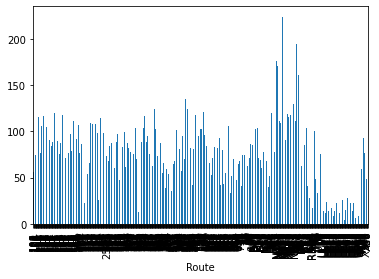

In [21]:
bus_sequences.groupby('Route').Stop_Code_LBSL.count().plot.bar()

In [19]:
bus_sequences.groupby('Route').Stop_Code_LBSL.count().mean()

73.27238335435057

In [8]:
measures = [
    lambda x: x.Bus_Stop_Code,
    lambda x: x.Stop_Name,
    lambda x: x.Naptan_Atco
]

(20184,)